In [1]:
%matplotlib inline
from matplotlib import pyplot as plot
from matplotlib import figure 

# Maze

### Distance Units: cm

In [2]:
class Block:
    
    def __init__(self, bottom_left, bottom_right, top_right, top_left):
        self.points = [
            bottom_left,
            bottom_right,
            top_right,
            top_left,
            bottom_left
        ]
    
    def intersects(self, other_block):

        if min(self.getX()) > max(other_block.getX()) or max(self.getX()) < min(other_block.getX()):
            return False

        if min(self.getY()) > max(other_block.getY()) or max(self.getY()) < min(other_block.getY()):
            return False

        else:
            return True        
    
    def getX(self):
        
        return [p[0] for p in self.points]
    
    def getY(self):
        
        return [p[1] for p in self.points]
        
class Maze:
    
    def __init__(self, size = (10,10), blocks = [], robot = None):
        
        self.size = size
        self.aspect_ratio = self.size[1] / self.size[0]
        self.blocks = blocks
        self.robot = robot
        self._createMazeWalls()
        
    def _createMazeWalls(self):
        
        thickness = 1 # cm
        
        wall_b = Block((-thickness,-thickness), (self.size[0]+thickness, -thickness), (self.size[0]+thickness, 0), (-thickness,0))
        wall_t = Block((-thickness, self.size[1]), (self.size[0]+thickness, self.size[1]), (self.size[0]+thickness, self.size[1]+thickness), (-thickness,self.size[1]+thickness))
        wall_l = Block((-thickness,0), (0,0), (0, self.size[1]), (-thickness,self.size[1]))
        wall_r = Block((self.size[0],0), (self.size[0]+thickness,0), (self.size[0]+thickness, self.size[1]), self.size)
        
        for wall in [wall_b, wall_t, wall_l, wall_r]:
            self.blocks.append(wall)
        
    def robotIntersects(self):
        
        # Check with walls
        for wall in self.blocks:
            if self.robot.intersects(wall):
                return True
            
        return False
    
    def show(self, size = 5):
        
        plot.rcParams["figure.figsize"] = (size,size*self.aspect_ratio)
        
        # Border
        plot.ylim(-1,self.size[1]+1)
        plot.xlim(-1,self.size[0]+1)
        plot.plot([
            0, 
            self.size[0],  
            self.size[1],  
            0,
            0],
            [0,
             0,
             self.size[1],
             self.size[1],
             0
            ], color = "orange", label="Maze")
        
        # Walls
        for block in self.blocks:
            plot.plot(block.getX(), block.getY(), color='orange')
            plot.fill_between(block.getX(), block.getY(), facecolor='orange')
            
        # Robot
        if self.robot:
            plot.plot(self.robot.getX(), self.robot.getY(), label="Robot", color='blue')
        
        
        plot.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        plot.show()
    
    def __repr__(self):
        self.show()
        return 'None'

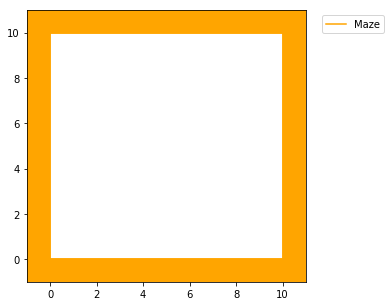

In [3]:
block = Block((0,0), [1,0], [1,1], [0,1])
maze = Maze(blocks=[])
maze.show()

# Robot

In [4]:
class Robot(Block):
    
    def __init__(self, size, origin = (0,0), motors = [], distance_sensors = []):
        
        super().__init__([0,0], [size[0], 0], [size[0], size[1]], [0, size[1]])
        self.size = size
        self.motors = motors
        self.distance_sensors = distance_sensors
        self.translate(origin)
    
    def translate(self, new_origin):
        move_x = [(p[0]+new_origin[0], p[1]) for p in self.points]
        move_y = [(p[0], p[1]+new_origin[1]) for p in move_x]
        
        self.points = move_y

In [5]:
block1 = Block((0,3), [10,3], [10,4], [0,4])
block2 = Block((0,6), [10,6], [10,7], [0,7])

maze = Maze(size = (10,10), blocks=[block1, block2])

### Intersections

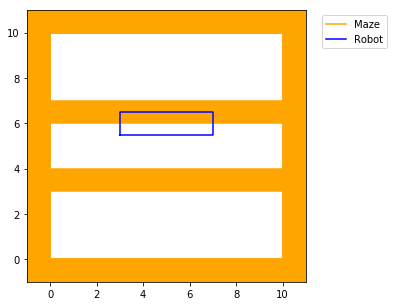

True


In [6]:
robo = Robot((4,1), origin=(3,5.5))
maze.robot = robo
maze.show()
print(maze.robotIntersects())

[(3, 7.5), (7, 7.5), (7, 8.5), (3, 8.5), (3, 7.5)]


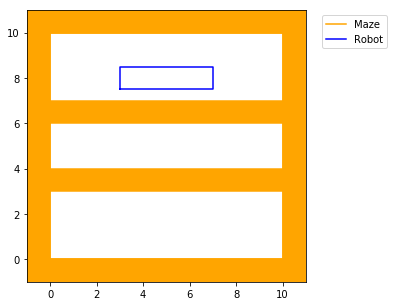

False


In [7]:
maze.robot.translate((0,2))
print(maze.robot.points)
maze.show()
print(maze.robotIntersects())

### Move

## Sensor

In [8]:
class Sensor:
    
    def __init__(self, mount_pos, mount_direction):
        
        self.mount_pos = mount_pos
        self.mount_direction = mount_direction